In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data PreProcessing

In [0]:
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
# null 비율

df.isnull().sum()/ len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

##seaborn

<BarContainer object of 12 artists>

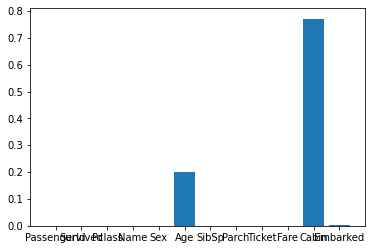

In [0]:
plt.bar(df.columns, df.isnull().sum()/ len(df))

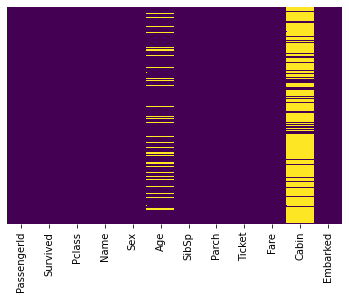

In [0]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

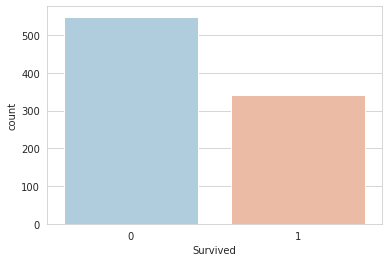

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, palette='RdBu_r')

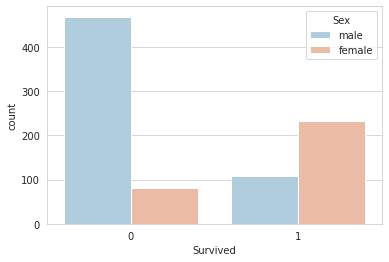

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex', palette='RdBu_r')

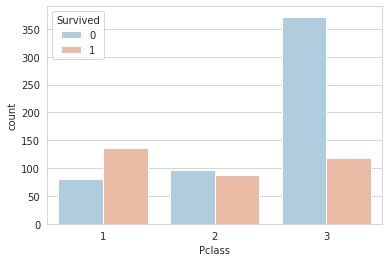

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=df, hue='Survived', palette='RdBu_r')

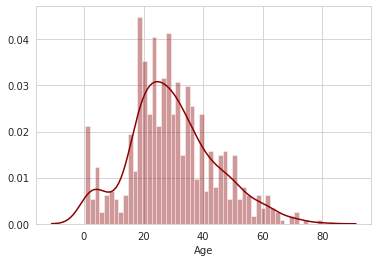

In [0]:
sns.distplot(df['Age'].dropna(), bins=50,color='darkred')

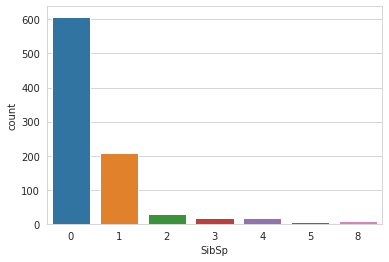

In [0]:
sns.countplot(x='SibSp', data =df)

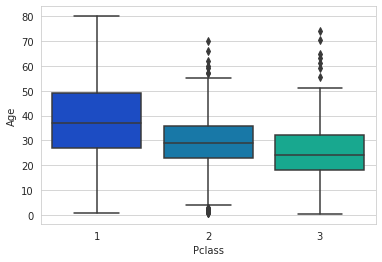

In [0]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

In [0]:
df.drop('Cabin', axis=1, inplace=True)

In [0]:
# 'Age'의 null값을 'pclass'의 평균 나이로 채우기

In [0]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [0]:
ages = []
for i in zip(df['Pclass'],df['Age']):
    age = i[1]
    pc = i[0]

    if str(age) == 'nan':
        if pc==1:
            ages.append(38)
        elif pc==2:
            ages.append(29)
        else:
            ages.append(25)
    else:
        ages.append(age)
        
df['Age'] = ages

In [0]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

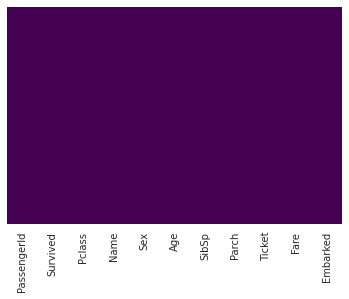

In [0]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
df.dropna(inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


##Save csv file

In [0]:
df.to_csv('output_titanic_train.csv')

In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

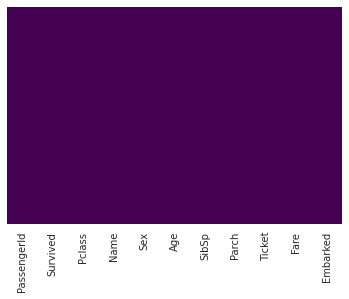

In [0]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [0]:
titanic_y = df['Survived']
titanic_x = df[['Pclass','Age', 'SibSp','Parch','Embarked', 'Sex']]

In [0]:
titanic_x

,Pclass,Age,SibSp,Parch,Embarked,Sex
0,3,22.0,1,0,S,male
1,1,38.0,1,0,C,female
2,3,26.0,0,0,S,female
3,1,35.0,1,0,S,female
4,3,35.0,0,0,S,male
...,...,...,...,...,...,...
886,2,27.0,0,0,S,male
887,1,19.0,0,0,S,female
888,3,25.0,1,2,S,female
889,1,26.0,0,0,C,male


In [0]:
titanic_x.shape, titanic_y.shape

((889, 6), (889,))

In [0]:
titanic_x.head()

,Pclass,Age,SibSp,Parch,Embarked,Sex
0,3,22.0,1,0,S,male
1,1,38.0,1,0,C,female
2,3,26.0,0,0,S,female
3,1,35.0,1,0,S,female
4,3,35.0,0,0,S,male


##set up dummy by get_dumies

In [0]:
titanic_x = pd.get_dummies(titanic_x, drop_first=True)

In [0]:
import statsmodels.api as sm
# variables = list(titanic_df.columns)
# y = 'Survived'
# x = [var for var in variables if var not in y ]

logit_model=sm.Logit(titanic_y,titanic_x)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.528221
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            6
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.2060
Time:                        05:04:23   Log-Likelihood:                -469.59
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 9.370e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.1228      0.079     -1.558      0.119      -0.277       0.032
Age            0.0251      0.

In [0]:
titanic_x.head()

,Pclass,Age,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,0,1,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,1,0
3,1,35.0,1,0,0,1,0
4,3,35.0,0,0,0,1,1


In [0]:
titanic_road = pd.read_csv('output_titanic_train.csv', index_col=0)
titanic_road.drop(columns=['PassengerId', 'Age'], axis=1, inplace=True)
titanic_road.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [0]:
pd.get_dummies(titanic_road, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

,Survived,Name,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,1,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,0,0,0,0,0
2,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,0,0,0,0,1
4,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,1,0,1,0,1
887,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,0,0,0,0,1
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,0,1,0,0,1
889,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,0,0,1,0,0


In [0]:
# train data - 학습할 데이터
# test data - 모델을 평가할 데이터..

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(titanic_x,titanic_y, test_size=0.2, random_state=777)

In [0]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [0]:
log.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = log.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0])

In [0]:
np.mean(y_test.values == predictions)

0.7528089887640449

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
confusion_matrix(y_test, predictions)

array([[86, 13],
       [31, 48]])

In [0]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        99
           1       0.79      0.61      0.69        79

    accuracy                           0.75       178
   macro avg       0.76      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178



In [0]:
import pickle

filename = 'log_titanic_model.sav'
pickle.dump(log, open(filename, 'wb'))

In [0]:
saved_logmodel = pickle.load(open(filename,'rb'))

In [0]:
saved_logmodel.predict(x_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0])